In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Training Test Split
from sklearn.linear_model import LinearRegression # For Model Train
from sklearn.metrics import mean_squared_error # mse
from sklearn.metrics import mean_absolute_error # mae

In [2]:
df = pd.read_csv('D:\Programming\ML_DATA\class 4 assignment\\Height-Weight Data.csv')

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.shape

(3501, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
df.keys()

Index(['Height', 'Weight'], dtype='object')

In [8]:
X = df.drop('Weight' , axis=1)
y = df['Weight']

# Training Test Split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=.70, random_state=51)

In [10]:
X_train.head()

,Height
2034,69.446391
2876,72.354772
1097,67.986374
1332,65.827787
741,76.012300


In [11]:
y_train.head()

2034    198.827817
2876    224.603655
1097    170.276248
1332    157.607936
741     235.437966
Name: Weight, dtype: float64

In [12]:
X_test.head()

,Height
2646,71.059956
2651,73.541609
898,67.272171
1630,71.471387
3012,67.942785


In [13]:
X_test.shape

(1051, 1)

In [14]:
y_test.head()

2646    189.324671
2651    214.343291
898     187.363366
1630    192.929107
3012    185.009610
Name: Weight, dtype: float64

# Fit Model

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
lr.predict(X_test)

array([198.95430003, 213.61425407, 176.57858491, ..., 185.32037619,
       201.7667834 , 159.97410215])

In [18]:
lr.predict([[3012]])

array([17572.07160459])

# M and intercept 

In [19]:
lr.coef_ # m = 5.90733474

array([5.90733474])

In [20]:
lr.intercept_ # c = -220.82064617349903

-220.82064617349903

# Add predict Value ,  Mean Squared Error , Mean Absolute Error for full Data 

In [30]:
df["Weight Predicte"] = lr.predict(df[['Height']]) # For Predict Value

In [35]:
df["MSE"] = mean_squared_error(df.Weight,lr.predict(df[['Height']])) # Mean Squared Error 

In [36]:
df["MAE"] = mean_absolute_error(df.Weight,lr.predict(df[['Height']])) # Mean Absolute Error 

In [38]:
df.head(20)

,Height,Weight,Weight Predicte,MSE,MAE
0,73.847017,241.893563,215.418403,106.014606,8.066924
1,68.781904,162.310473,185.497085,106.014606,8.066924
2,74.110105,212.740856,216.972554,106.014606,8.066924
3,71.730978,220.042470,202.918255,106.014606,8.066924
4,69.881796,206.349801,191.994515,106.014606,8.066924
5,67.253016,152.212156,176.465430,106.014606,8.066924
6,68.785081,183.927889,185.515854,106.014606,8.066924
7,68.348516,167.971111,182.936914,106.014606,8.066924
8,67.018950,175.929440,175.082724,106.014606,8.066924
9,63.456494,156.399676,154.038105,106.014606,8.066924


# visuals

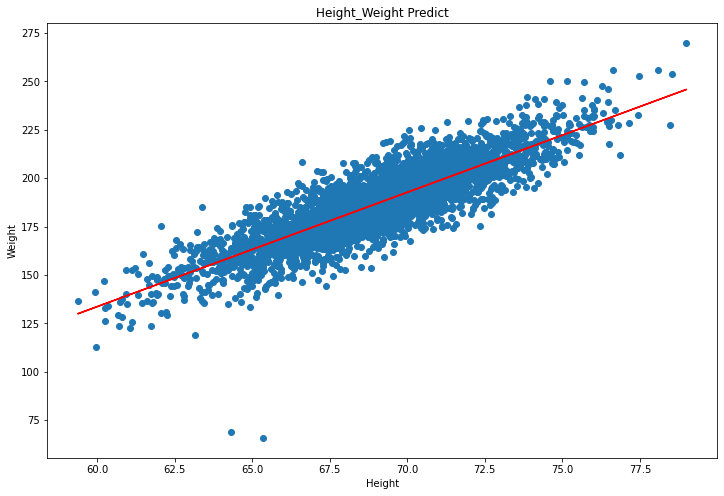

In [22]:
# For Full Data
plt.figure(figsize=(12,8))
plt.title("Height_Weight Predict")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df['Height'],df['Weight'], marker='o')
plt.plot(df[['Height']] , lr.predict(df[['Height']]), color='red')


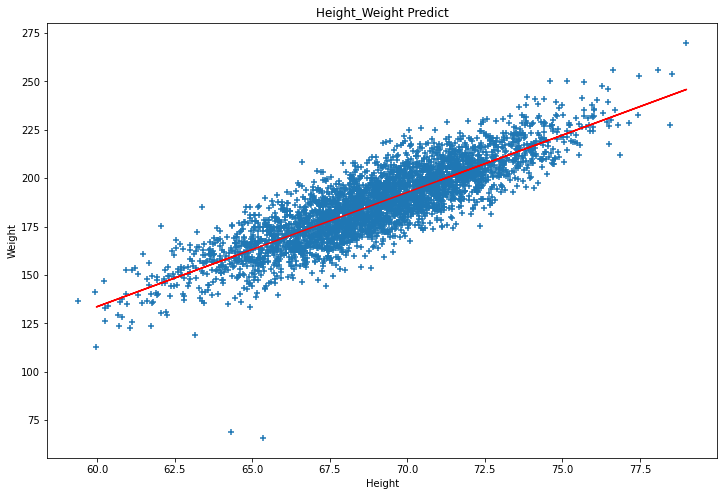

In [23]:
# For Test Data
plt.figure(figsize=(12,8))
plt.title("Height_Weight Predict")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df['Height'],df['Weight'], marker='+')
plt.plot(X_test , lr.predict(X_test), color='red')

# R-Squared Value

In [24]:
lr.score(X_test,y_test) # Testing 

0.7275411097359441

In [25]:
lr.score(df[['Height']],df.Weight) #full Data

0.7323008822370316

In [26]:
lr.score(X_train,y_train) # For training Data

0.7345672453866984

# Error

In [39]:
mean_absolute_error(y_test,lr.predict(X_test))

8.058604832445095

In [33]:
mse = mean_squared_error(y_test,lr.predict(X_test)) # for training Error

In [34]:
mse

116.24213921420572